# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hanna Tashya Portuna
- **Email:** mc185d5x0288@student.devacademy.id
- **ID Dicoding:** MC185D5X0288

## Menentukan Pertanyaan Bisnis


- Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
- Bagaimana tren penggunaan sepeda berdasarkan waktu dalam sehari?
- Apakah terdapat pola peminjaman sepeda berdasarkan kategori waktu (pagi,
siang, sore, malam)?
- Bagaimana distribusi jumlah peminjaman sepeda berdasarkan kategori (rendah, sedang, tinggi)?

## Import Semua Packages/Library yang Digunakan

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data

In [67]:
day_df = pd.read_csv("https://raw.githubusercontent.com/hannatashyaa/bike/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [68]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/hannatashyaa/bike/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai tabel** day_df


In [69]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [70]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [71]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [72]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [73]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


**Menilai Table** Hour_df

In [74]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [75]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [76]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [77]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**Membersihkan tabel day_df**

**Duplicate Data**

In [78]:
day_df.drop_duplicates(inplace=True)

In [79]:
print("Jumlah duplikasi (day.csv):", day_df.duplicated().sum())

Jumlah duplikasi (day.csv): 0


**Missing values**

In [80]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Mengubah Tipe Data

In [81]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [82]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [83]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Membersihkan tabel hour_df**

Duplicate Data

In [84]:
hour_df.drop_duplicates(inplace=True)

In [85]:
print("Jumlah duplikasi (hour.csv):", hour_df.duplicated().sum())

Jumlah duplikasi (hour.csv): 0


Missing Value

In [86]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Mengubah Tipe data

In [87]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [88]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [89]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore day_df

In [90]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
144,145,2011-05-25,2,0,5,0,3,1,1,0.660833,0.615542,0.696250,0.154233,740,4238,4978
650,651,2012-10-12,4,1,10,0,5,1,1,0.437500,0.433071,0.539167,0.235092,1060,6222,7282
567,568,2012-07-21,3,1,7,0,6,0,3,0.595833,0.549912,0.865417,0.213300,1264,3195,4459
186,187,2011-07-06,3,0,7,0,3,1,1,0.720000,0.685633,0.743333,0.149883,784,3845,4629
535,536,2012-06-19,2,1,6,0,2,1,1,0.688333,0.654692,0.690000,0.148017,968,5857,6825


In [91]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [92]:
day_df.instant.is_unique

True

In [93]:
day_df.duplicated().sum()

0

In [94]:
day_df.groupby("season").agg({
    "cnt": ["sum", "mean", "max", "min"]
})

cnt                         
            sum         mean   max   min
season                                  
1        471348  2604.132597  7836   431
2        918589  4992.331522  8362   795
3       1061129  5644.303191  8714  1115
4        841613  4728.162921  8555    22

In [95]:
day_df.groupby("workingday").agg({
    "cnt": ["sum", "mean", "max", "min"]
})

cnt                        
                sum         mean   max  min
workingday                                 
0           1000269  4330.168831  8714  605
1           2292410  4584.820000  8362   22

In [96]:
day_df.groupby("holiday").agg({
    "cnt": ["sum", "mean", "max", "min"]
})

cnt                         
             sum         mean   max   min
holiday                                  
0        3214244  4527.104225  8714    22
1          78435  3735.000000  7403  1000

In [97]:
day_df.groupby("weekday").cnt.sum().sort_values(ascending=False)

,cnt
weekday,
5,487790
4,485395
6,477807
3,473048
2,469109
1,455503
0,444027


Explore Hour_df

In [98]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6777,6778,2011-10-14,4,0,10,23,0,5,1,1,0.46,0.4545,0.59,0.1642,15,80,95
15594,15595,2012-10-16,4,1,10,23,0,2,1,1,0.40,0.4091,0.71,0.0000,23,176,199
3735,3736,2011-06-09,2,0,6,13,0,4,1,1,0.90,0.8182,0.37,0.0896,18,118,136
9518,9519,2012-02-06,1,1,2,13,0,1,1,1,0.38,0.3939,0.40,0.2239,17,124,141
355,356,2011-01-16,1,0,1,7,0,0,0,2,0.24,0.2121,0.56,0.2985,0,3,3


In [99]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [100]:
hour_df.instant.is_unique

True

In [101]:
hour_df.duplicated().sum()

0

In [102]:
hour_df.groupby("hr").agg({
    "cnt": ["sum", "mean", "max", "min"]
}).sort_values(by=("cnt", "sum"), ascending=False)


cnt                     
       sum        mean  max min
hr                             
17  336860  461.452055  976  15
18  309772  425.510989  977  23
8   261001  359.011004  839   5
16  227748  311.983562  783  11
19  226789  311.523352  743  11
13  184919  253.661180  760  11
12  184414  253.315934  776   3
15  183149  251.233196  750   7
14  175652  240.949246  750  12
20  164550  226.030220  567  11
9   159438  219.309491  426  14
7   154171  212.064649  596   1
11  151320  208.143054  663  10
10  126257  173.668501  539   8
21  125445  172.314560  584   6
22   95612  131.335165  502   9
23   63941   87.831044  256   2
6    55132   76.044138  213   1
0    39130   53.898072  283   2
1    24164   33.375691  168   1
2    16352   22.869930  132   1
5    14261   19.889819   66   1
3     8174   11.727403   79   1
4     4428    6.352941   28   1

In [103]:
hour_df.groupby("weathersit").agg({
    "cnt": ["sum", "mean", "max", "min"]
})


cnt                     
                sum        mean  max min
weathersit                              
1           2338173  204.869272  977   1
2            795952  175.165493  957   1
3            158331  111.579281  891   1
4               223   74.333333  164  23

In [104]:
hour_df.groupby(pd.cut(hour_df.temp, bins=5)).cnt.mean()

<ipython-input-104-726abc68b256>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(pd.cut(hour_df.temp, bins=5)).cnt.mean()


,cnt
temp,
"(0.019, 0.216]",65.069159
"(0.216, 0.412]",123.066828
"(0.412, 0.608]",194.671096
"(0.608, 0.804]",260.695279
"(0.804, 1.0]",326.276446


 Menggabungkan Data day_df dan hour_df

In [105]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Menggabungkan DataFrames
day_hour_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    on="dteday"
)

# Menampilkan beberapa baris pertama untuk memastikan penggabungan berhasil
print(day_hour_df.head())

   instant_x     dteday  season_x  yr_x  mnth_x  hr  holiday_x  weekday_x  \
0          1 2011-01-01         1     0       1   0          0          6   
1          2 2011-01-01         1     0       1   1          0          6   
2          3 2011-01-01         1     0       1   2          0          6   
3          4 2011-01-01         1     0       1   3          0          6   
4          5 2011-01-01         1     0       1   4          0          6   

   workingday_x  weathersit_x  ...  weekday_y  workingday_y  weathersit_y  \
0             0             1  ...          6             0             2   
1             0             1  ...          6             0             2   
2             0             1  ...          6             0             2   
3             0             1  ...          6             0             2   
4             0             1  ...          6             0             2   

     temp_y   atemp_y     hum_y  windspeed_y  casual_y  registered_y  cnt_

In [106]:
day_hour_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [107]:
day_hour_df.groupby(by="season_x")["cnt_x"].nunique().sort_values(ascending=False).head(10)

,cnt_x
season_x,
3,760
2,721
4,690
1,482


In [108]:
day_hour_df.groupby(by="weathersit_x")["cnt_x"].nunique().sort_values(ascending=False)

,cnt_x
weathersit_x,
1,848
2,649
3,368
4,3


In [109]:
day_hour_df["temp_group"] = day_hour_df["temp_x"].apply(
    lambda x: "Cold" if x <= 0.3 else ("Warm" if x > 0.7 else "Mild")
)
print(day_hour_df[["temp_x", "temp_group"]].head())

   temp_x temp_group
0    0.24       Cold
1    0.22       Cold
2    0.22       Cold
3    0.24       Cold
4    0.24       Cold


In [110]:
# Menyimpan ke CSV
day_hour_df.to_csv("day_hour_data.csv", index=False)

# Mengunduh file CSV
from google.colab import files
files.download("day_hour_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Visualization & Explanatory Analysis

**Bagaimanapengaruh musim terhadap jumlah peminjaman sepeda?**

In [111]:
season_rentals = day_df.groupby("season")["cnt"].sum()

<ipython-input-112-902979a0070a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_rentals.index, y=season_rentals.values, palette="Blues")


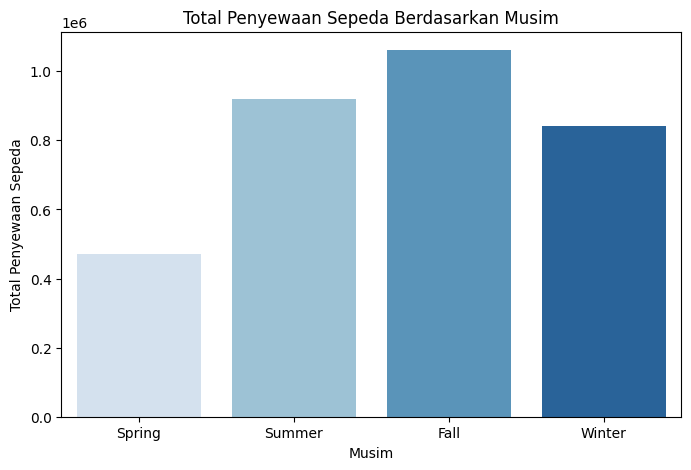

In [112]:
plt.figure(figsize=(8,5))
sns.barplot(x=season_rentals.index, y=season_rentals.values, palette="Blues")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")
plt.show()

Insight:



*   Penyewaan tertinggi terjadi pada musim gugur (fall).
*   Penyewaan lebih rendah saat musim dingin (winter), kemungkinan karena faktor cuaca.




**Bagaimana tren penggunaan sepeda berdasarkan waktu dalam sehari?**

In [113]:
hourly_rentals = hour_df.groupby("hr")["cnt"].sum()

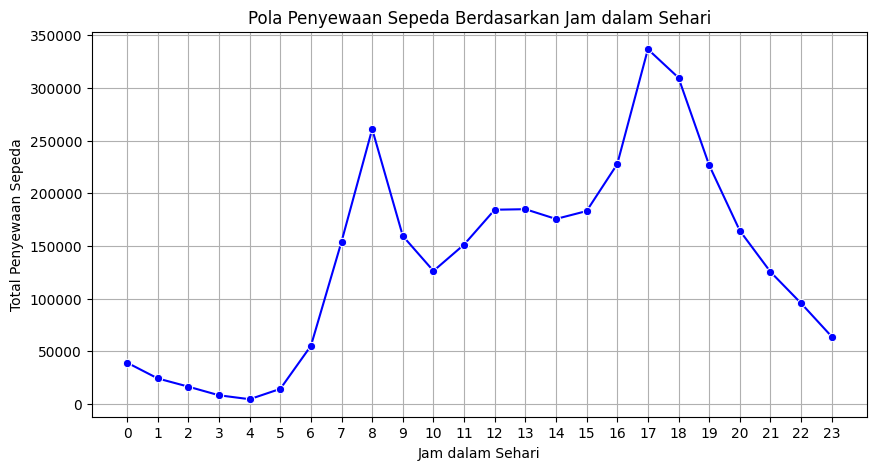

In [114]:
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker="o", linestyle="-", color="blue")
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam dalam Sehari")
plt.grid()
plt.show()

**Insight:**



*   Peminjaman meningkat tajam pada jam 7-9 pagi dan 17-19 sore (jam sibuk kerja).
*   Peminjaman rendah pada malam hari (23.00 - 04.00).



## Analisis Lanjutan : Manual Grouping dan Binning


a. Manual Grouping: Kategori Waktu

**Apakah terdapat pola peminjaman sepeda berdasarkan kategori waktu (pagi, siang, sore, malam)?**

In [115]:
def categorize_time(hour):
    if 5 <= hour < 11:
        return "Pagi"
    elif 11 <= hour < 15:
        return "Siang"
    elif 15 <= hour < 19:
        return "Sore"
    else:
        return "Malam"

hour_df["time_category"] = hour_df["hr"].apply(categorize_time)


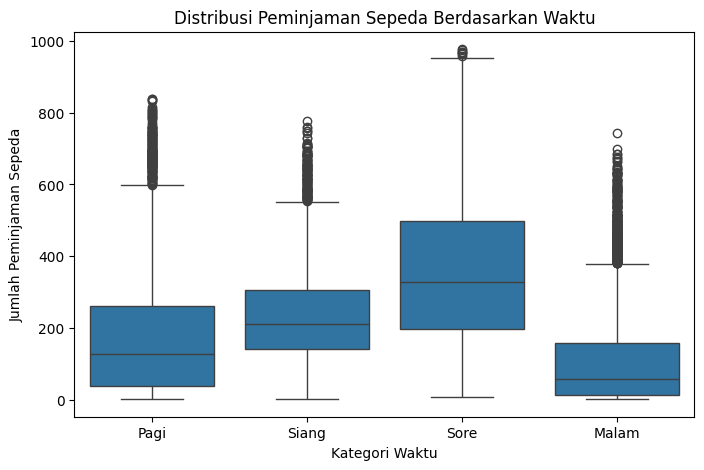

In [116]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="time_category", y="cnt", data=hour_df, order=["Pagi", "Siang", "Sore", "Malam"])
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Waktu")
plt.xlabel("Kategori Waktu")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

**Insight:**


*   Sore hari memiliki jumlah peminjaman tertinggi, sesuai dengan pola jam sibuk pulang kerja/sekolah.
*   Malam hari memiliki jumlah peminjaman paling rendah, kemungkinan karena faktor keamanan dan kenyamanan.




b. Binning: Kategori Jumlah Peminjaman

**Bagaimana distribusi jumlah peminjaman sepeda berdasarkan kategori (rendah, sedang, tinggi)?**

In [117]:
bins = [0, 50, 200, hour_df["cnt"].max()]
labels = ["Rendah", "Sedang", "Tinggi"]
hour_df["cnt_category"] = pd.cut(hour_df["cnt"], bins=bins, labels=labels, include_lowest=True)

<ipython-input-118-5d96334da05b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="cnt_category", data=hour_df, order=["Rendah", "Sedang", "Tinggi"], palette="viridis")


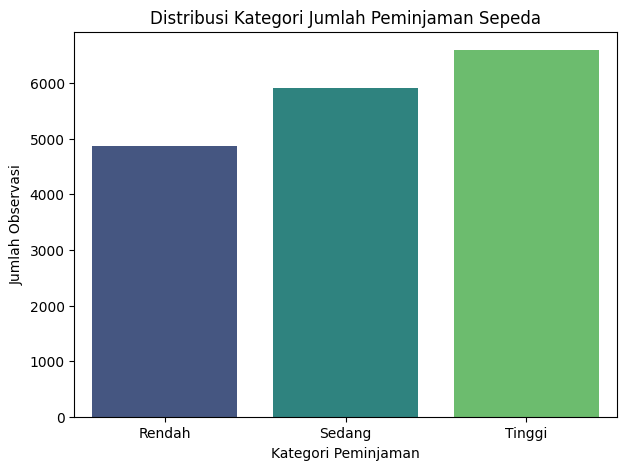

In [118]:
plt.figure(figsize=(7, 5))
sns.countplot(x="cnt_category", data=hour_df, order=["Rendah", "Sedang", "Tinggi"], palette="viridis")
plt.title("Distribusi Kategori Jumlah Peminjaman Sepeda")
plt.xlabel("Kategori Peminjaman")
plt.ylabel("Jumlah Observasi")
plt.show()

**Insight :**



*   Sebagian besar data masuk dalam kategori "Rendah".
*   Peminjaman kategori "Tinggi" hanya terjadi pada jam-jam sibuk.



## Conclusion

1. **Pada musim apa jumlah penyewaan sepeda paling tinggi? Bagaimana pola penyewaan sepeda berdasarkan musim?**
Hasil analisis menunjukkan bahwa jumlah penyewaan sepeda bervariasi di setiap musim. Musim gugur memiliki jumlah penyewa terbanyak, sementara musim dingin memiliki jumlah penyewa paling sedikit. Ini menunjukkan bahwa faktor musim sangat mempengaruhi jumlah penyewaan sepeda. Musim dengan jumlah penyewaan tertinggi menunjukkan adanya peningkatan variasi pengguna, yang bisa disebabkan oleh kenyamanan bersepeda di musim tertentu. Musim semi dan musim panas lebih mendukung aktivitas luar ruangan dibandingkan dengan musim dingin, di mana suhu dingin dan kondisi cuaca yang buruk bisa mengurangi jumlah penyewaan sepeda.
2. **Pada jam berapa jumlah penyewaan sepeda paling banyak terjadi?**
Jumlah penyewaan sepeda meningkat pada jam-jam sibuk, yaitu pukul 07:00-09:00 pagi dan 17:00-19:00 sore. Peningkatan ini kemungkinan besar disebabkan oleh aktivitas komuter, seperti orang yang berangkat dan pulang kerja atau sekolah. Sebaliknya, jumlah peminjaman sepeda menurun drastis pada malam hari (setelah pukul 22:00). Ini menunjukkan bahwa sebagian besar penyewaan sepeda masih bergantung pada jadwal harian masyarakat dan kurang diminati di luar jam sibuk.
3. **Bagaimana distribusi jumlah penyewa sepeda berdasarkan kategori waktu (pagi, siang, sore, malam)?**
Setelah dilakukan pengelompokan waktu (manual grouping), terlihat bahwa sore hari memiliki jumlah penyewaan tertinggi, sedangkan malam hari memiliki jumlah penyewaan paling sedikit. Hal ini mengindikasikan bahwa sore hari adalah waktu favorit pengguna sepeda, kemungkinan karena aktivitas rekreasi setelah bekerja atau sekolah. Sebaliknya, jumlah penyewaan pada malam hari yang rendah bisa disebabkan oleh faktor keamanan dan berkurangnya aktivitas luar ruangan.
4. **Bagaimana distribusi jumlah penyewa sepeda berdasarkan kategori jumlah peminjaman (rendah, sedang, tinggi)?**
Dengan menggunakan teknik binning, ditemukan bahwa sebagian besar peminjaman sepeda masuk dalam kategori "rendah", terutama pada waktu-waktu di luar jam sibuk. Hanya pada jam sibuk pagi dan sore jumlah peminjaman masuk dalam kategori "tinggi", menandakan bahwa sebagian besar penyewaan masih terpusat pada waktu-waktu tertentu dan tidak merata sepanjang hari.